# Maximizing Driver Revenue

## Problem Statement

In the competitive taxi industry, optimizing revenue streams is essential for long-term success and driver satisfaction. With the advent of digital payments, understanding how payment methods impact fare pricing has become increasingly important for maximizing earnings.

Our research focuses on leveraging data-driven insights to determine whether there is a significant relationship between the total fare amount and payment type. By analyzing the connection between payment methods (e.g., cash versus credit cards) and fare pricing, we aim to uncover actionable strategies for increasing driver revenue.

## Objective
The primary goal of this project is to conduct a hypothesis test to examine whether the method of payment influences total fare amounts. Using Python for hypothesis testing and descriptive statistics, we aim to answer the following:

- Are customers who pay via credit cards associated with higher fare amounts compared to those paying with cash?
- Can insights from payment trends guide strategies for encouraging higher-revenue payment methods without impacting customer satisfaction?

## Research Question
**Does the method of payment have a significant impact on the total fare amount?**

By answering this question, we aim to provide practical recommendations to taxi drivers and operators on how to align payment policies with revenue optimization.

## Importing Libraries 

In [6]:
# to store and process data in dataframes
import pandas as pd
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns
# for advanced statistics
import scipy.stats as st
# for statistical plotting
import statsmodels.api as sm
# for regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [8]:
data = pd.read_csv("C:/Users/Admin/Documents/Data Analyst Projects/Maximizing revenue for drivers/data.csv")

In [9]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In this section, we explore the dataset to understand its structure and key attributes. The main goals of EDA are:

1. Assess the completeness and cleanliness of the dataset.
2. Analyze distributions of important features such as trip_distance, fare_amount, and pickup_datetime.
3. Identify patterns or anomalies that might influence revenue.

In [12]:
# Understanding the size of data

data.shape

(6405008, 18)

In [13]:
# Ensuring the correct datatypes for each column
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [14]:
# changing the data type object to datetime

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [15]:
#Calculating the duration of trip of each trip

data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'].dt.total_seconds()/60   # converting it into minutes

In [16]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [17]:
## Creating a focused subset based on our objective

df = data[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [18]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


### Removing Null Values and Duplicates

In [20]:
# Checking for missing values

df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [21]:
# Getting percent of missing data

65441/len(df)*100

1.021716132126611

In [22]:
# Since the percent of missing data is very low it won't affect our analysis and hence can be safely dropped

df.dropna(inplace = True)

In [23]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [24]:
#Changing Data type

df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [25]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [26]:
#Removing duplicates

df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


We see high duplicate count as we have ignored quite a few columns from original dataset. 
These duplicate rows will not contibute anything to our analysis hence can be safely dropped.

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.shape

(3007861, 5)

In [30]:
# Understanding the range and percent of each possible value for different columns

df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [31]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [32]:
#Based on column description of our data we only want to consider Credit card and cash payments
df = df[df['payment_type']<3]

In [33]:
#Since no passenger situation is not possible and count of passengers more than 6 contirbutes very less in our data we can safely ignore those records.
df = df[(df['passenger_count'] > 0)&(df['passenger_count']<6)]

In [34]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [35]:
df['payment_type'].replace([1,2], ['card', 'cash'], inplace = True)

In [36]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000
6339564,1,card,12.5,2.55,16.283333


In [37]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Since there cannot be negative fare amount, trip distance, and duration, some data is incorrect, and hence need to be removed

In [39]:
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]

In [40]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


### Handling Outliers

In [42]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [43]:
# Checking for outliers

(array([2.737029e+06, 1.189600e+04, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.66666667e-02, 8.52526667e+02, 1.70503667e+03, 2.55754667e+03,
        3.41005667e+03, 4.26256667e+03, 5.11507667e+03, 5.96758667e+03,
        6.82009667e+03, 7.67260667e+03, 8.52511667e+03]),
 <BarContainer object of 10 artists>)

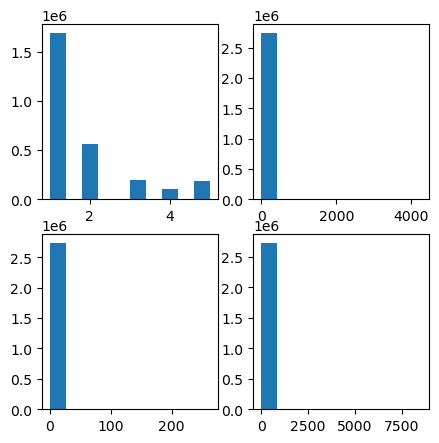

In [44]:
plt.figure(figsize = (5,5))
		
plt.subplot(2,2,1)
plt.hist(df['passenger_count'])

plt.subplot(2,2,2)
plt.hist(df['fare_amount'])

plt.subplot(2,2,3)
plt.hist(df['trip_distance'])

plt.subplot(2,2,4)
plt.hist(df['duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2da0f5370e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2da0f537650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2da0f536e10>],
 'medians': [<matplotlib.lines.Line2D at 0x2da0f537b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2da0f537e90>],
 'means': []}

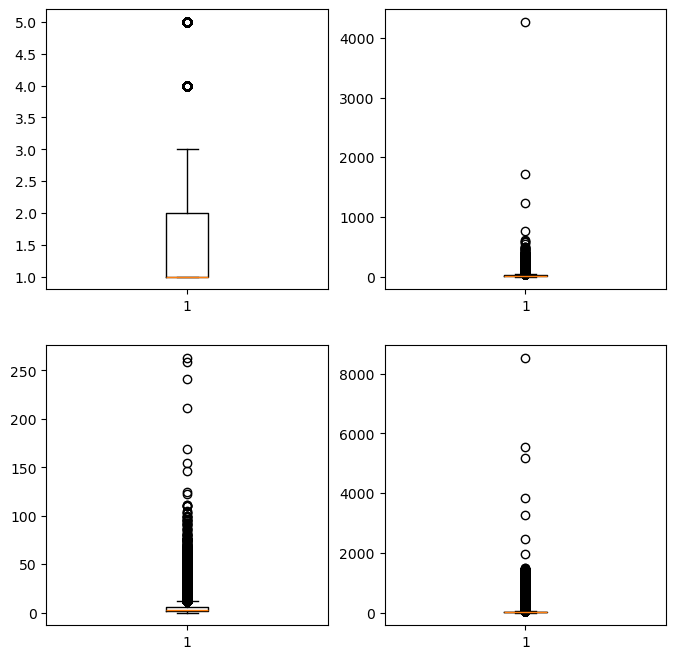

In [45]:
plt.figure(figsize = (8,8))
		
plt.subplot(2,2,1)
plt.boxplot(df['passenger_count'])

plt.subplot(2,2,2)
plt.boxplot(df['fare_amount'])

plt.subplot(2,2,3)
plt.boxplot(df['trip_distance'])

plt.subplot(2,2,4)
plt.boxplot(df['duration'])

`Outliers can be handled either using z-score or IQR, and since the data is not normally distributed, we will use IQR`

In [47]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    df = df[(df[col]>= lower_bound) & (df[col]<= upper_bound)]
    

In [48]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


### Visualization

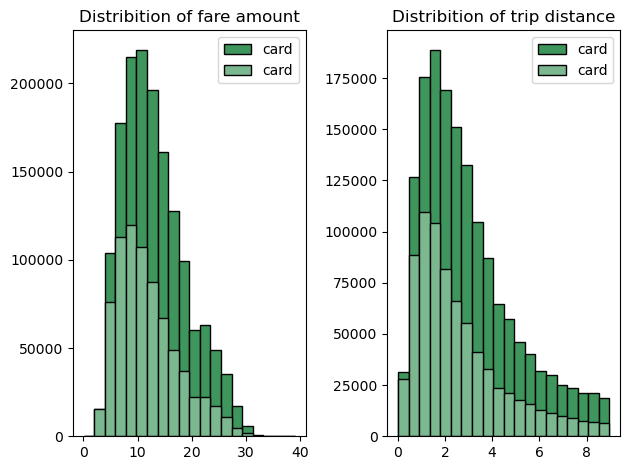

In [134]:
# Visualizing choice of payment type based on fare amount & trip distance


plt.figure(figure = (10,5))

plt.subplot(1,2,1)
plt.title('Distribition of fare amount')
plt.hist(df[df['payment_type'] == 'card']['fare_amount'], histtype = 'barstacked', bins = 20, label = 'card', edgecolor = 'k', color = '#3e965c')
plt.hist(df[df['payment_type'] == 'cash']['fare_amount'], histtype = 'barstacked',  bins = 20, label = 'card', edgecolor = 'k', color = '#7bb890')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribition of trip distance')
plt.hist(df[df['payment_type'] == 'card']['trip_distance'], histtype = 'barstacked', bins = 20, label = 'card', edgecolor = 'k', color = '#3e965c')
plt.hist(df[df['payment_type'] == 'cash']['trip_distance'], histtype = 'barstacked',  bins = 20, label = 'card', edgecolor = 'k', color = '#7bb890')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

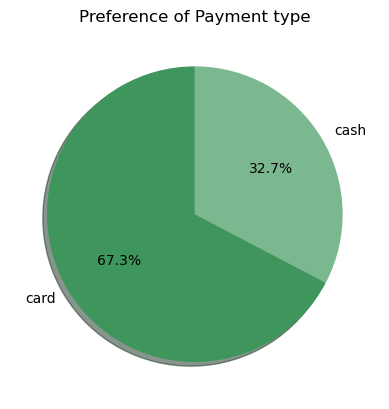

In [52]:
# Visualizing overall distribution of payment type

plt.title('Preference of Payment type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index, 
        startangle = 90, autopct = '%1.1f%%', colors = ['#3e965c', '#7bb890'], shadow = True)
plt.show()

In [53]:
# Understanding of passenger count on payment type

passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = { 'passenger_count' : 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)
passenger_count

,payment_type,passenger_count,count
0,card,1,909245
1,card,2,327661
2,card,3,122412
3,card,4,63676
4,card,5,124045
5,cash,1,460550
6,cash,2,155472
7,cash,3,54506
8,cash,4,32715
9,cash,5,47626


In [54]:
passenger_count['perc'] = passenger_count['count']/ passenger_count['count'].sum()*100
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [55]:
# Creating a new transformed dataset to eventually create a stacked bar chart based on passenger count
unique_passenger_count = [x for x in passenger_count['passenger_count'].unique()]

In [56]:
pc = pd.DataFrame(columns = ['payment_type', 1,2,3,4,5])
pc['payment_type'] = ['card', 'cash']
pc.iloc[0, 1:] = passenger_count.iloc[:5,-1]
pc.iloc[1, 1:] = passenger_count.iloc[5:,-1]
pc

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


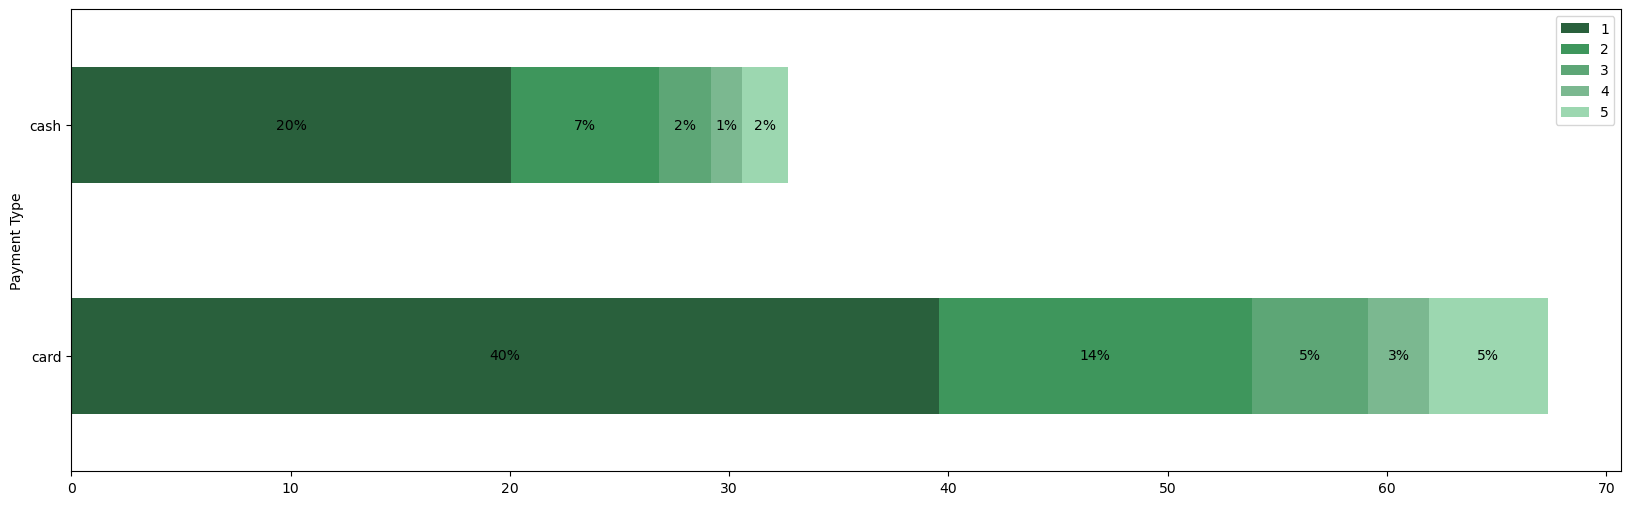

In [57]:
# Visualizing impact of passenger count on payment type

fig, ax = plt.subplots(figsize = (20,6))
pc.plot(x = 'payment_type', kind = 'barh', stacked = True, color = ['#29603c', '#3e965c', '#5da676', '#7bb890', '#9cd7b0'], 
        ax = ax, ylabel = 'Payment Type')

#Adding percent text

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x,y = bar.get_xy()
    
    ax.text( x + width/2, y + height/2, '{:.0f}%'.format(width),horizontalalignment = 'center', 
    verticalalignment = 'center' )

## Hypothesis Testing

**Null Hypothesis :**  There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative Hypothesis :** There is a difference in average fare between customers who use credit cards and customers who use cash.

Which Test to Use for Comparing payment_type (2 Groups) and fare_amount (Continuous):

- **Chi-square:** Cannot be used with continuous variables like fare_amount.
- **ANOVA:** Can be used if there are 2 or more groups, but for exactly 2 groups, a t-test is usually preferred.
- **Z Test:** Only if the sample size is large, the population standard deviation is known, and the distribution is normal.
- **T Test:** Typically used for comparing the means of two independent groups (e.g., Card vs Cash) when the sample size is small and the population standard deviation is unknown.

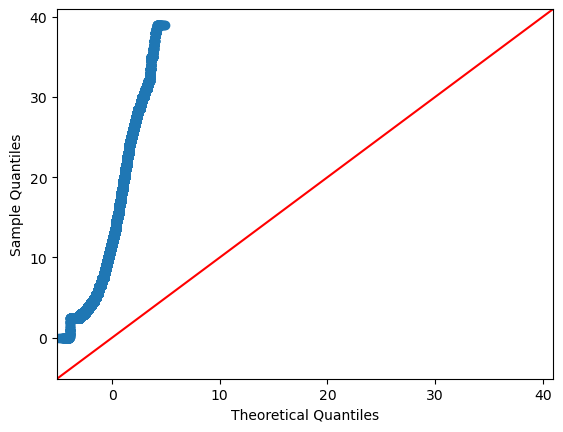

In [61]:
# Checking if Fare Amount is normall distrubited

sm.qqplot(df['fare_amount'], line = '45')
plt.show()

# Since the points are not aligned with the line, we can deduce that fare_amount is not normally distributed

Since we have **`unknown population std deviation`** and the data is **`continuous`** and **`not normally distributed`**, the best way to test the hypothesis would be using **`t-test`**

In [63]:
card_sample = df[df['payment_type'] == 'card']['fare_amount']
cash_sample = df[df['payment_type'] == 'cash']['fare_amount']

In [64]:
t_stats, p_value = st.ttest_ind( a = card_sample, b = cash_sample, equal_var = False)
print('T statistic :', t_stats, 'p-value :', p_value)

T statistic : 169.2111527245052 p-value : 0.0


What does this output signify?

**Result:**

The t-statistic of 169.21 is extremely high, suggesting that the means of the two groups (e.g., card_sample and cash_sample) are very different.

A p-value of 0.0 means that the probability of observing such a large difference in sample means under the null hypothesis is extremely small (effectively zero).

Conclusion:

Statistically significant result: Since the p-value is less than the commonly used significance level of 0.05 (and even far smaller), **we reject the null hypothesis** and conclude that **there is a significant difference between the two groups being compared (i.g., Payment Type - Card and Cash groups).**

## Performing Linear Regression

Using Python's scikit-learn library for the regression analysis based on below columns -

1. `trip_duration_minutes` (numeric, independent variable X)
2. `fare_amount` (float, dependent variable Y)

In [69]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [70]:
# Define Features (X) and Target (Y)

X = data[['duration']]  # Independent variable (ensure it’s a 2D array)
y = data['fare_amount']  # Dependent variable


In [71]:
# Creating training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Fit the Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [74]:
# Evaluating the model

# Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

#R squared error
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

Train MSE: 144.77262390371942, Test MSE: 141.78242524104948
Train R²: 0.020235411107627943, Test R²: 0.017485593657060927


**What does this output signify?**

1. **MSE results**

    - The Train and Test MSE values are relatively close, suggesting that the model has similar performance on both datasets and is not overfitting or underfitting.
    - However, the values themselves are quite high, implying that the model's predictions are not very close to the actual values.

2. **R squared results**

    - the 𝑅 squared values for both Train and Test datasets are extremely low (~2% and ~1.7%), suggesting that trip duration has minimal explanatory power for predicting fare amount in your data.
  
**Conclusion:**

1. The very low 𝑅 squared values suggest that trip duration alone is not a strong predictor of fare amount.
2. The close Train and Test MSE values indicate that the model generalizes similarly on unseen data, even though the predictions are not highly accurate.

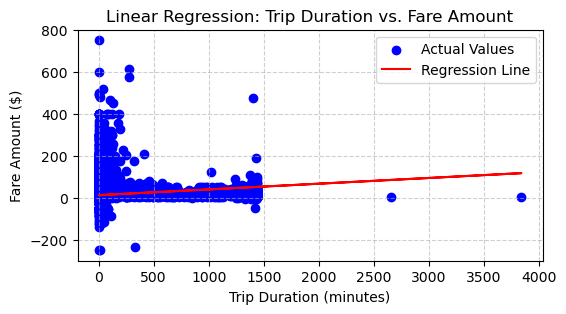

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_test_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()